<a href="https://colab.research.google.com/github/simaadleyba/CS412-Spring-23-24/blob/main/CS412_HW1_SimaAdleyba_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS412 Machine Learning, Spring 2024: Homework 1
## Sima Adleyba - 28889

## Import Statements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1 - Is your nearest neighbor close to you in high-dimensional space?

### 1.1 Data Generation

Write a function random_points(num_points, num_dimensions) to generate numbers from a Normal distribution, num points random points in a num dimensions- dimensional space.

In [ ]:
def random_points(num_points, num_dimensions):

    # Generate the data
    data = np.random.normal(loc=0.0, scale=1.0, size=(num_points, num_dimensions))

    # Return the data
    return data

### 1.2 Average Distance of A Selected Point
Write a function average_distance_sp(points, selected_point) to calculate the average distance of the selected point to all other points in points.

In [ ]:
def average_distance_sp(points, selected_point):

  # Make sure that points is a NumPy array
  points = np.array(points)

  # Calculate total distance
  total_distance = 0
  for point in points:
    total_distance += np.linalg.norm(point - selected_point)

  # Calculate average distance
  average_distance = total_distance / len(points)

  # Return the result
  return average_distance

### 1.3 Minimum Distance of a Selected Point
Write a function minimum_distance_sp(points, selected_point) to calculate the minimum distance of the selected point and to all the other points in points.

In [ ]:
def minimum_distance_sp(points, selected_point):

  # Make sure that points is a NumPy array
  points = np.array(points)

  # Initialize a pre-defined big distance
  min_distance = np.int64(10**18)

  # Loop through the points and update the min_distance if applicable
  for point in points:
      distance = np.linalg.norm(point - selected_point)
      if (distance < min_distance) and not np.all(point == selected_point):
          min_distance = distance

  # Return the result
  return min_distance

### 1.4 Closest-to-Average Ratio
Write a function closest_to_average_ratio(min_dist, avg_dist) to calculate the ratio of the closest distance to the average distance.

In [ ]:
def closest_to_average_ratio(min_dist, avg_dist):

  # Return the average distance
  return min_dist / avg_dist

### 1.5 Experimentation and Visualization:


*   Perform the following steps. For a given dimension d:
    -   Generate 1000 d-dimensional data points, let’s call this set Sd
    -   Select a random point from Sd and calculate the average distance, minimum distance, and closest-to-average ratio. Perform this for 100 different randomly selected points. Call this set Ad
    -   Aggregate the results and compute the mean and standard deviation across the Ad.
    - Repeat the steps above for all dimensions d = 1, 2 . . . 100


*   The mean average distance, the mean minimum distance, and the mean the closest-to-average ratio as line plots against the number of dimensions. Show the standard deviation of the distributions as well. The x-axis is varying d from 1 to 100. The y-axis is the metric value calculated.
*   Plot a histogram of all pairwise distances for cases where d is 2, 5, 10, and 100 dimensions.
*   Analyze, interpret, and discuss the trends observed in the plots.



<Figure size 1000x600 with 0 Axes>

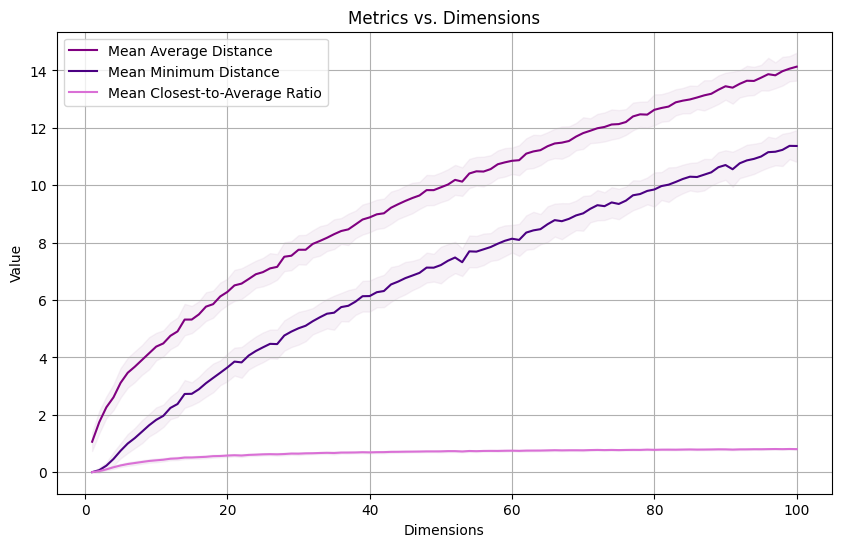


Side by side look



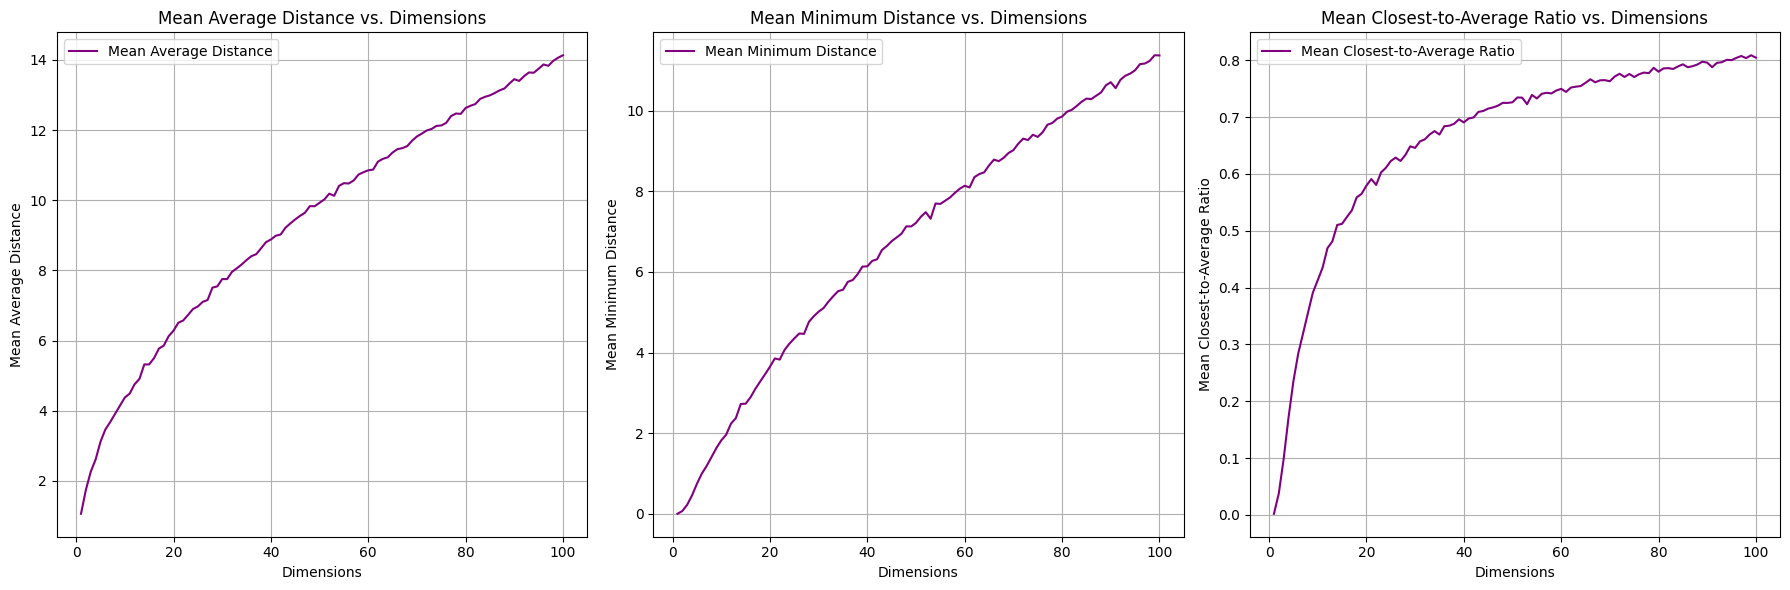

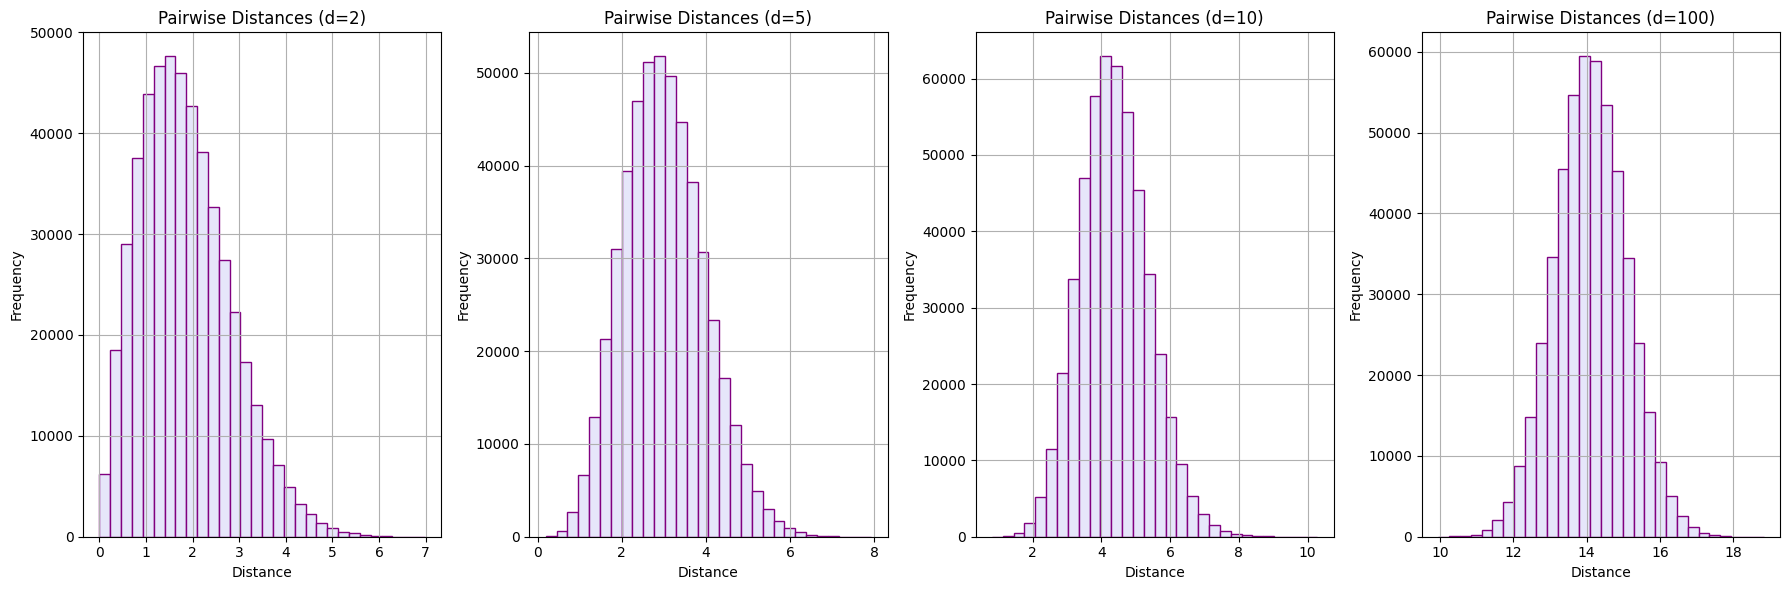

In [ ]:
# Initialize lists
mean_avg_distance = []
mean_min_distance = []
mean_closest_to_avg = []
std_avg_distance = []
std_min_distance = []
std_closest_to_avg = []

# Initialize dimensions and number of metrics for plotting the histogram  of d = 2, 5, 10, 100
specific_dimensions = [2, 5, 10, 100]
num_metrics = 3  # Mean average distance, mean minimum distance, mean closest-to-average ratio

# Initialize 2D numpy arrays to store mean values
specific_mean_avg_distance = np.zeros((len(specific_dimensions), num_metrics))
specific_mean_min_distance = np.zeros((len(specific_dimensions), num_metrics))
specific_mean_closest_to_avg = np.zeros((len(specific_dimensions), num_metrics))
specific_std_avg_distance = np.zeros((len(specific_dimensions), num_metrics))
specific_std_min_distance = np.zeros((len(specific_dimensions), num_metrics))
specific_std_closest_to_avg = np.zeros((len(specific_dimensions), num_metrics))

# Generate 1000 d-dimensional points for d = 1, 2, ... , 100
for d in range(1, 101):
    points = random_points(1000, d)

    # Initialize lists
    avg_distances = []
    min_distances = []
    closest_to_avg_ratios = []

    # Select a random point and calculate average distance, minimum distance, and closest-to-average ratio for 100 random points
    for _ in range(100):

        # Select a random point
        random_index = np.random.choice(len(points))
        selected_point = points[random_index]

        # Calculate the average distance, minimum distance, and closest-to-average ratio
        avg_dist = average_distance_sp(points, selected_point)
        min_dist = minimum_distance_sp(points, selected_point)
        closest_to_avg_ratio = closest_to_average_ratio(min_dist, avg_dist)

        # Add to lists
        avg_distances.append(avg_dist)
        min_distances.append(min_dist)
        closest_to_avg_ratios.append(closest_to_avg_ratio)

        if d in specific_dimensions:
          index = specific_dimensions.index(d)
          specific_mean_avg_distance[index, 0] = np.mean(avg_distances)
          specific_mean_min_distance[index, 1] = np.mean(min_distances)
          specific_mean_closest_to_avg[index, 2] = np.mean(closest_to_avg_ratios)
          specific_std_avg_distance[index, 0] = np.std(avg_distances)
          specific_std_min_distance[index, 1] = np.std(min_distances)
          specific_std_closest_to_avg[index, 2] = np.std(closest_to_avg_ratios)



    # Compute mean and standard deviation
    mean_avg_distance.append(np.mean(avg_distances))
    mean_min_distance.append(np.mean(min_distances))
    mean_closest_to_avg.append(np.mean(closest_to_avg_ratios))
    std_avg_distance.append(np.std(avg_distances))
    std_min_distance.append(np.std(min_distances))
    std_closest_to_avg.append(np.std(closest_to_avg_ratios))

d = range(1, 101)
plt.figure(figsize=(10, 6))

# Plot metrics
plt.figure(figsize=(10, 6))

# Plot metrics with shaded regions representing standard deviations
plt.plot(d, mean_avg_distance, label='Mean Average Distance', color='purple') # Mean average distance
plt.fill_between(d, np.array(mean_avg_distance) - np.array(std_avg_distance), np.array(mean_avg_distance) + np.array(std_avg_distance), alpha=0.2, color="thistle")
plt.plot(d, mean_min_distance, label='Mean Minimum Distance', color='indigo')  # Mean Minimum Distance
plt.fill_between(d, np.array(mean_min_distance) - np.array(std_min_distance), np.array(mean_min_distance) + np.array(std_min_distance), alpha=0.2, color="thistle")
plt.plot(d, mean_closest_to_avg, label='Mean Closest-to-Average Ratio', color='orchid') # Mean Closest-to-Average Ratio
plt.fill_between(d, np.array(mean_closest_to_avg) - np.array(std_closest_to_avg), np.array(mean_closest_to_avg) + np.array(std_closest_to_avg), alpha=0.2, color="thistle")

plt.title('Metrics vs. Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("\nSide by side look\n")

# Plot metrics one by one

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Mean average distance plot
axs[0].plot(d, mean_avg_distance, label='Mean Average Distance', color='purple')
axs[0].set_title('Mean Average Distance vs. Dimensions')
axs[0].set_xlabel('Dimensions')
axs[0].set_ylabel('Mean Average Distance')
axs[0].legend()
axs[0].grid(True)

# Mean Minimum Distance plot
axs[1].plot(d, mean_min_distance, label='Mean Minimum Distance', color='purple')
axs[1].set_title('Mean Minimum Distance vs. Dimensions')
axs[1].set_xlabel('Dimensions')
axs[1].set_ylabel('Mean Minimum Distance')
axs[1].legend()
axs[1].grid(True)

# Mean Closest-to-Average Ratio plot
axs[2].plot(d, mean_closest_to_avg, label='Mean Closest-to-Average Ratio', color='purple')
axs[2].set_title('Mean Closest-to-Average Ratio vs. Dimensions')
axs[2].set_xlabel('Dimensions')
axs[2].set_ylabel('Mean Closest-to-Average Ratio')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Plot histograms for pairwise distances
plt.figure(figsize=(18, 6))

for i, d in enumerate(specific_dimensions, 1):
    plt.subplot(1, len(specific_dimensions), i)
    points = random_points(1000, d)
    pairwise_distances = []

    # Calculate pairwise distances
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            pairwise_distances.append(minimum_distance_sp(np.array([points[i]]), points[j]))

    plt.hist(pairwise_distances, bins=30, color='lavender', edgecolor='purple')
    plt.title(f'Pairwise Distances (d={d})')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Conclusion


## 2 - k-NN Classifier In Action

##Import Statements


In [ ]:
import keras
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score

### 2.1 Dataset
The Fashion-MNIST dataset is a collection of 28x28 grayscale images of 70,000 fashion products from 10 different categories, each represented by 7,000 images with each pixel value ranging from 0 to 255.

You will reserve 20% of the training data for validation and use the remaining 80% for training your models. Before splitting the data, ensure that it is shuffled to maintain the representativeness of both the training and validation sets. This step helps in preventing any bias that might be introduced due to the order of the data.

It is important to note that the official test set of 10,000 samples should not be used for model selection or hyperparameter tuning during development. This test set should only be used at the end of your project to evaluate the final performance of your chosen model.

### Loading and Splitting the Data

In [ ]:
# Load data
(X, y), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Split the whole train part into training and validation, also shuffle
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

# Check the dataset and shapes
print("Type of dataset\n", type(X_train), type(y_train), "\n")
print("Shape of dataset")
print('X_train shape:', X_train.shape, ', y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape, ', y_val shape:', y_val.shape)
print('X_test shape: ', X_test.shape, ', y_test shape: ', y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Type of dataset
 <class 'numpy.ndarray'> <class 'numpy.ndarray'> 

Shape of dataset
X_train shape: (48000, 28, 28) , y_train shape: (48000,)
X_val shape: (12000, 28, 28) , y_val shape: (12000,)
X_test shape:  (10000, 28, 28) , y_test shape:  (10000,)


### 2.2 Find the Best K
Note on Data Preprocessing for k-NN: The Fashion-MNIST images provided by Keras are in a 3D array format (samples, 28, 28), representing the number of samples and the dimensions of each image. However, the k-NN classifier implemented in the Scikit-learn library requires input data in a 2D array format (samples, features). Therefore, before training your k-NN model, you must reshape the dataset from 3D arrays into 2D arrays. This process, often referred to as ‘flattening ’, converts each 28x28 image into a 784-dimensional vector.

Your task is to build k-NN classifier using the Scikit-learn library. You will train the k-NN classifier using the training set and tune the hyperparameters to optimize its performance on the validation set. Specifically, you will determine the optimal number of nearest neighbors (referred to as n neighbors in the documentation) to use.

To find the optimal value of k neighbors, you should experiment with the following values: [1, 3, 7, 12, 20, 30, 50, 75, 100]. For each value, evaluate the performance of the classifier on the validation set. Print out the optimal value of k. Plot the validation accuracy for the different values of k neighbors, creating a graph where the x-axis represents the values of k neighbors, and the y-axis represents the corresponding validation accuracy. This visualization will aid in selecting the most suitable value for k neighbors. Utilize the matplotlib library to generate the plot.

Now that you have determined the optimal value of k neighbors, you should retrain the k-NN classifier by combining the training and validation sets. Then, assess its performance on the test set, and print out the test accuracy. This will provide an estimate of the test accuracy and how well your classifier is expected to perform on new, unseen data.

Finally, plot the confusion matrix for the final model’s predictions across the ten classes. Discuss any patterns or insights you can draw from this visualization. For example, which classes have the highest number of misclassifications? Are there specific pairs of classes that are commonly mistaken for one another?

### Flattening

In [ ]:
# Flatten the feature arrays
X_flattened = X.reshape(X.shape[0], -1) # Flatten the whole data
X_train_flattened = X_train.reshape(X_train.shape[0], -1) # Flatten the train data that'll be used to select the best k
X_val_flattened = X_val.reshape(X_val.shape[0], -1) # Flatten the validation data
X_test_flattened = X_test.reshape(X_test.shape[0], -1) # Flatten test data

# Flatten the target arrays
y_flattened = y.ravel() # Flatten the whole data
y_train_flattened = y_train.ravel() # Flatten the train data that'll be used to select the best k
y_val_flattened = y_val.ravel() # Flatten the validation data
y_test_flattened = y_test.ravel() # Flatten test data

# Check the shapes
print('Flattened X_train shape:', X_train_flattened.shape)
print('Flattened X_val shape:', X_val_flattened.shape)

Flattened X_train shape: (48000, 784)
Flattened X_val shape: (12000, 784)


## Building and Training KNN With Different K Neighbors

k = 1 
Training Accuracy: 1.0 
Validation Accuracy: 0.85125 

k = 3 
Training Accuracy: 0.9161666666666667 
Validation Accuracy: 0.8510833333333333 

k = 7 
Training Accuracy: 0.8845416666666667 
Validation Accuracy: 0.8521666666666666 

k = 12 
Training Accuracy: 0.8716041666666666 
Validation Accuracy: 0.8474166666666667 

k = 20 
Training Accuracy: 0.8568333333333333 
Validation Accuracy: 0.8375833333333333 

k = 30 
Training Accuracy: 0.84825 
Validation Accuracy: 0.8336666666666667 

k = 50 
Training Accuracy: 0.8361458333333334 
Validation Accuracy: 0.8266666666666667 

k = 75 
Training Accuracy: 0.8268125 
Validation Accuracy: 0.8210833333333334 

k = 100 
Training Accuracy: 0.8200625 
Validation Accuracy: 0.8143333333333334 

Optimal value of k: 7 



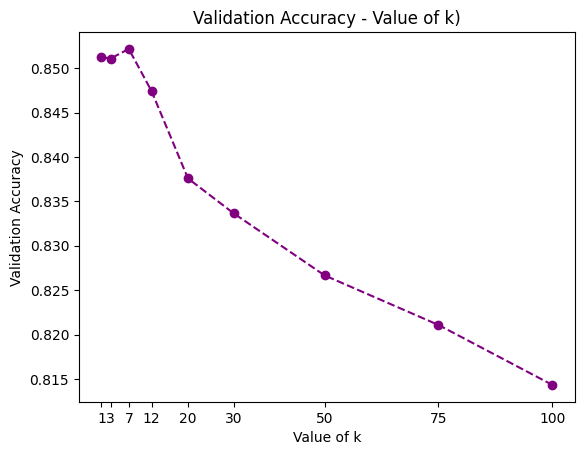

In [ ]:
# Initialize an array for possible k numbers and validation accuracies
k_nums = [1, 3, 7, 12, 20, 30, 50, 75, 100]
train_accuracies = []
validation_accuracies = []

# Loop through possible k numbers and experiment
for k in k_nums:

  # Initialize KNN
  knn = KNN(n_neighbors=k)

  # Train KNN
  knn.fit(X_train_flattened, y_train_flattened)

  # Calculate accuracies
  train_accuracy = knn.score(X_train_flattened, y_train_flattened)
  train_accuracies.append(train_accuracy)

  validation_accuracy = knn.score(X_val_flattened, y_val_flattened)
  validation_accuracies.append(validation_accuracy)

  # Print accuracies
  print("k =", k, "\nTraining Accuracy:", train_accuracy, "\nValidation Accuracy:", validation_accuracy, "\n")

# Find the optimal value of k by taking the value that maximizes the validation accuracy
optimal_k = k_nums[np.argmax(validation_accuracies)]
print("Optimal value of k:", optimal_k, "\n")

# Plot the validation accuracy for different values of k (line graph)
plt.plot(k_nums, validation_accuracies, marker='o', linestyle='--', color="purple")
plt.title('Validation Accuracy - Value of k)')
plt.xlabel('Value of k')
plt.ylabel('Validation Accuracy')
plt.xticks(k_nums)
plt.show()

##Retraining KNN with the Optimal k Number

In [ ]:
# Initialize KNN
knn = KNN(n_neighbors = 7)

# Train KNN
knn.fit(X_flattened, y_flattened)

# Make prediction and calculate accuracy
y_pred = knn.predict(X_test_flattened)
accuracy = knn.score(X_test_flattened, y_test_flattened)

# Print accuracy
print("Accuracy of KNN with k = 7:", accuracy)

Accuracy of KNN with k = 7: 0.854


## Confusion Matrix

<Figure size 800x800 with 0 Axes>

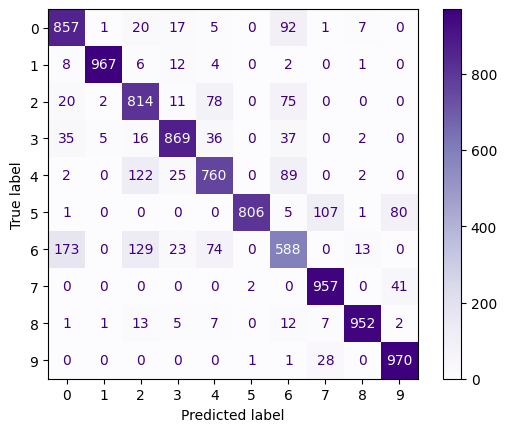

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, colorbar=True, cmap="Purples")

## Conclusion
From the confusion matrix, we can see that class of number "6" was correctly precticted the least. Also, the model confused it with class of number "0" the most. Class of number "6" also got misclassified as "2" 129 times, which is the second highest pair of misclassification.
Therefore it can be concluded that the model is not doing a good job classifying the class "6".

When it comes to the other numbers, it can be seen that class of number "4" got misclassified as class of number "2" 122 times, which is also high.
